In [1]:
#Ada Boost ML

In [2]:
#Zayıf modelleri toplayarak güçlü modeller yapmaya çalışır

In [3]:
#Tree Stump var ilk zayıf model eğitilr 

In [4]:
#Ağırlıklar normalleştrilir ve yeni örnek seçimi için bin sistemi kurulur

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv(
    r"C:\Users\Mangtay\Desktop\DataScience\MachineLearning\Datasets\16-diabetes.csv"
)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Burada bazı hormonların değerleri 0 geliyor bunlarda sorun var bunlar sıfır olmaması gerekmektedir 

In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df["Insulin"].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64

In [24]:


# most probably there can be 0 in pregnancy hormones but others do not make sense. let's check them automatically.
# you can use generative ai at this point to ask for guidance if you are not sure and if you don't have a domain expert at hand

columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count /len(df)
    print(f"{col}: {zero_count} %{zero_percentage:.2f}")



Glucose: 5 %0.65
BloodPressure: 35 %4.56
SkinThickness: 227 %29.56
Insulin: 374 %48.70
BMI: 11 %1.43


In [25]:
#Burada 0 olaarak girilen değerler çok fazla olanlar var çıkarılması gerekmekte

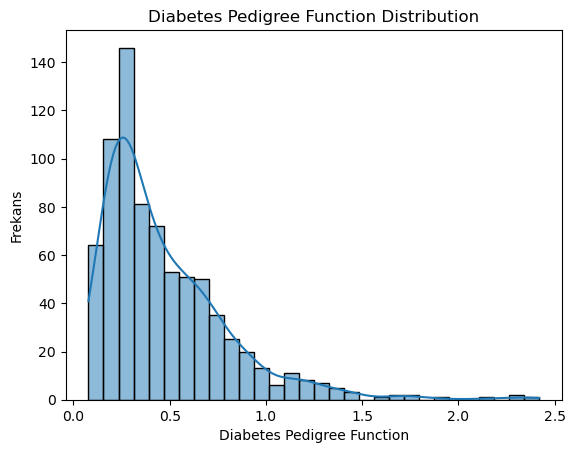

In [26]:


sns.histplot(df['DiabetesPedigreeFunction'], bins=30, kde=True)
plt.title('Diabetes Pedigree Function Distribution')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frekans')
plt.show()



In [27]:
#Insulin diyabet için çok önemli burada kolonun hepsini silmek mantıksız bu nedenle bizim burada farklı bir şey yapmamız gerekmektedir>

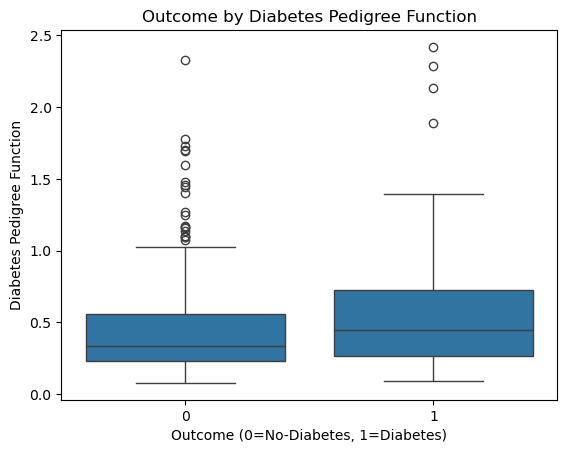

In [28]:


sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Outcome by Diabetes Pedigree Function')
plt.xlabel('Outcome (0=No-Diabetes, 1=Diabetes)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()



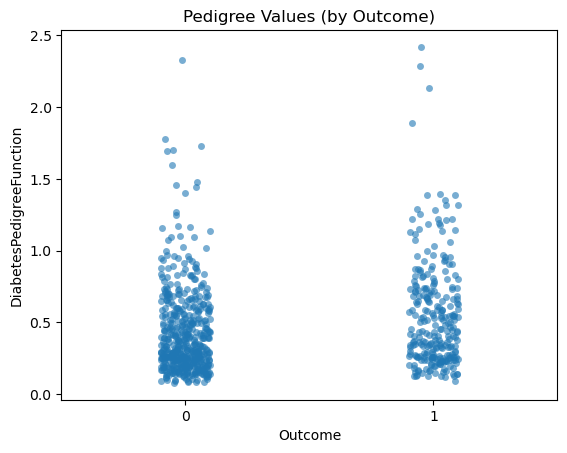

In [29]:
sns.stripplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, jitter=True, alpha=0.6)
plt.title('Pedigree Values (by Outcome)')
plt.show()

In [30]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [32]:
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [33]:
medians = {}
for col in columns_to_fill:
    median_value = X_train[X_train[col] != 0][col].median()
    medians[col] = median_value
    X_train[col] = X_train[col].replace(0, median_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0, medians[col])

In [35]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.560261,72.612378,29.040717,142.477199,32.448208,0.469948,33.285016
std,3.385438,29.974412,12.165642,8.312217,80.879330,6.862948,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [38]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.597403,122.038961,71.487013,29.376623,144.402597,32.483117,0.479565,33.064935
std,3.304818,32.320876,11.813495,10.513035,104.291511,6.946159,0.343303,12.118519
min,0.000000,61.000000,30.000000,7.000000,23.000000,18.400000,0.078000,21.000000
25%,1.000000,95.250000,64.000000,23.250000,108.250000,26.925000,0.254000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.376500,28.000000
75%,5.750000,142.750000,80.000000,33.750000,129.500000,36.950000,0.603750,41.000000
max,13.000000,197.000000,106.000000,99.000000,846.000000,55.000000,2.329000,69.000000


In [39]:
# scaler is not important in tree algorithms but they are important in regression, logistic regression etc.
# where we measure distance and use gradient descent. we do not need to do standardscaler but if you want you can
# use it anyway. if you comment this out you will see you will get the same result. if you will use alternative
# algorithms with adaboost, maybe it makes sense to use standardscale

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [45]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)


In [46]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.58      0.63      0.60        46

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.76       154

0.7532467532467533
[[87 21]
 [17 29]]


In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
adaboost_param = {
        "n_estimators" : [50, 70, 100, 120, 150, 200],
        "learning_rate" : [0.001, 0.01, 0.1, 1, 10]
}

In [49]:
grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = adaboost_param, cv = 5, verbose = 1, n_jobs = -1)

In [50]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,AdaBoostClassifier()
,param_grid,"{'learning_rate': [0.001, 0.01, ...], 'n_estimators': [50, 70, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [51]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [52]:
ada = AdaBoostClassifier(learning_rate=1, n_estimators=150)

In [53]:
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.59      0.65      0.62        46

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154

0.7597402597402597
[[87 21]
 [16 30]]
